In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from IPython.display import Image
import seaborn as sns
import re
import dateutil.parser
import pandas as pd
%matplotlib inline
import random


%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/nikolaithomas/sf16_ds4/master/challenges/02-pandas/2013_movies.csv?token=AT_fvMddn_bCtKuCnq8gK0EQL60LdU_Gks5YBFtEwA%3D%3D')
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,6/21/13 0:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,12/13/13 0:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00


In [133]:
df['DATE'] = pd.to_datetime(df['ReleaseDate'], infer_datetime_format=True)
df['Releaseyear'] = df['DATE'].dt.year

df['Rating'].unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

# 2.1

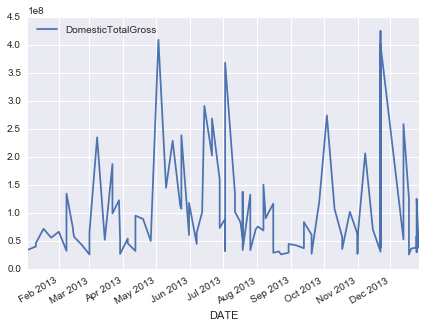

In [134]:

df.plot(x='DATE',y="DomesticTotalGross", figsize=(7,5));


# 2.2

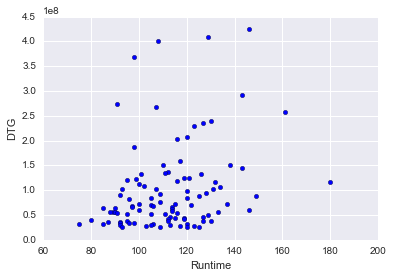

In [135]:
plt.scatter(df.Runtime,df.DomesticTotalGross);
plt.xlabel('Runtime')
plt.ylabel('DTG');

# 2.3

In [136]:
df2 = df.groupby([df['Rating']]).mean().reset_index()
df2

,Rating,Budget,DomesticTotalGross,Runtime,Releaseyear
0,G,NaN,2.684928e+08,107.000000,2013.0
1,PG,9.393333e+07,1.311357e+08,99.933333,2013.0
2,PG-13,9.660976e+07,1.114498e+08,117.510638,2013.0
3,R,3.886364e+07,6.989243e+07,110.729730,2013.0


In [137]:
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,DATE,Releaseyear
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,2013-11-22,2013
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,2013-05-03,2013
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,2013-11-22,2013
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,2013-07-03,2013
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,2013-06-14,2013
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00,2013-10-04,2013
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,6/21/13 0:00,2013-06-21,2013
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,12/13/13 0:00,2013-12-13,2013
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00,2013-05-24,2013
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00,2013-03-08,2013


# 2.4

In [199]:
dfa = df[df['Rating'].isin(['G'])].reset_index()
dfb = df[df['Rating'].isin(['PG'])].reset_index()
dfc = df[df['Rating'].isin(['PG-13'])].reset_index()
dfd = df[df['Rating'].isin(['R'])].reset_index()


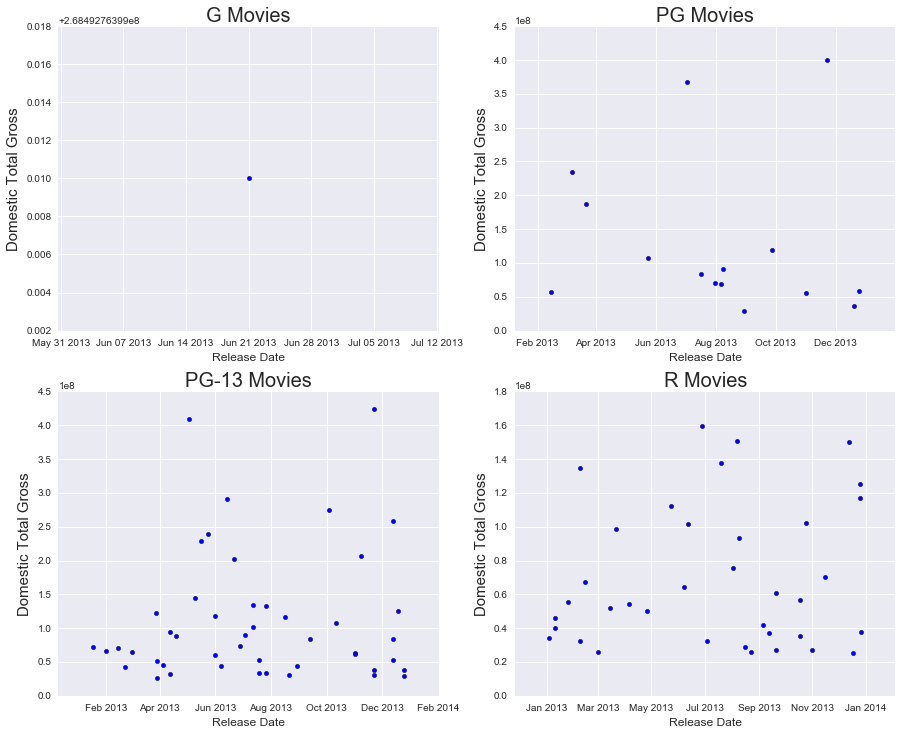

In [244]:

fig = plt.subplots(2, 2, figsize=(15, 12))
plt.subplot(2,2,1)
plt.title('G Movies', fontsize = 20)
plt.xlabel('Release Date', fontsize = 12)
plt.ylabel('Domestic Total Gross', fontsize = 15)
plt.scatter(np.array(dfa['DATE']), dfa['DomesticTotalGross'])



plt.subplot(2,2,2)
plt.title('PG Movies', fontsize = 20)
plt.xlabel('Release Date', fontsize = 12)
plt.ylabel('Domestic Total Gross', fontsize = 15)
plt.scatter(np.array(dfb['DATE']), dfb['DomesticTotalGross'])



plt.subplot(2,2,3)
plt.title('PG-13 Movies', fontsize = 20)
plt.xlabel('Release Date', fontsize = 12)
plt.ylabel('Domestic Total Gross', fontsize = 15)
plt.scatter(np.array(dfc['DATE']), dfc['DomesticTotalGross'])



plt.subplot(2,2,4)
plt.title('R Movies', fontsize = 20)
plt.xlabel('Release Date', fontsize = 12)
plt.ylabel('Domestic Total Gross', fontsize = 15)
plt.scatter(np.array(dfd['DATE']), dfd['DomesticTotalGross'])

# 2.5

In [245]:
df3 = df.groupby([df['Director']]).mean().reset_index().sort_values(['DomesticTotalGross'], ascending = [False]).reset_index()
df3
#Francis Lawrence

,index,Director,Budget,DomesticTotalGross,Runtime,Releaseyear
0,27,Francis Lawrence,130000000.0,424668047.0,146.0,2013.0
1,81,Shane Black,200000000.0,409013994.0,129.0,2013.0
2,15,Chris BuckJennifer Lee,150000000.0,400738009.0,108.0,2013.0
3,71,Pierre CoffinChris Renaud,76000000.0,368061265.0,98.0,2013.0
4,92,Zack Snyder,225000000.0,291045518.0,143.0,2013.0
5,2,Alfonso Cuaron,100000000.0,274092705.0,91.0,2013.0
6,17,Dan Scanlon,NaN,268492764.0,107.0,2013.0
7,69,Peter Jackson,NaN,258366855.0,161.0,2013.0
8,49,Justin Lin,160000000.0,238679850.0,130.0,2013.0
9,79,Sam Raimi,215000000.0,234911825.0,127.0,2013.0


# 2.6

In [246]:
df['Releasemonth'] = df['DATE'].dt.month

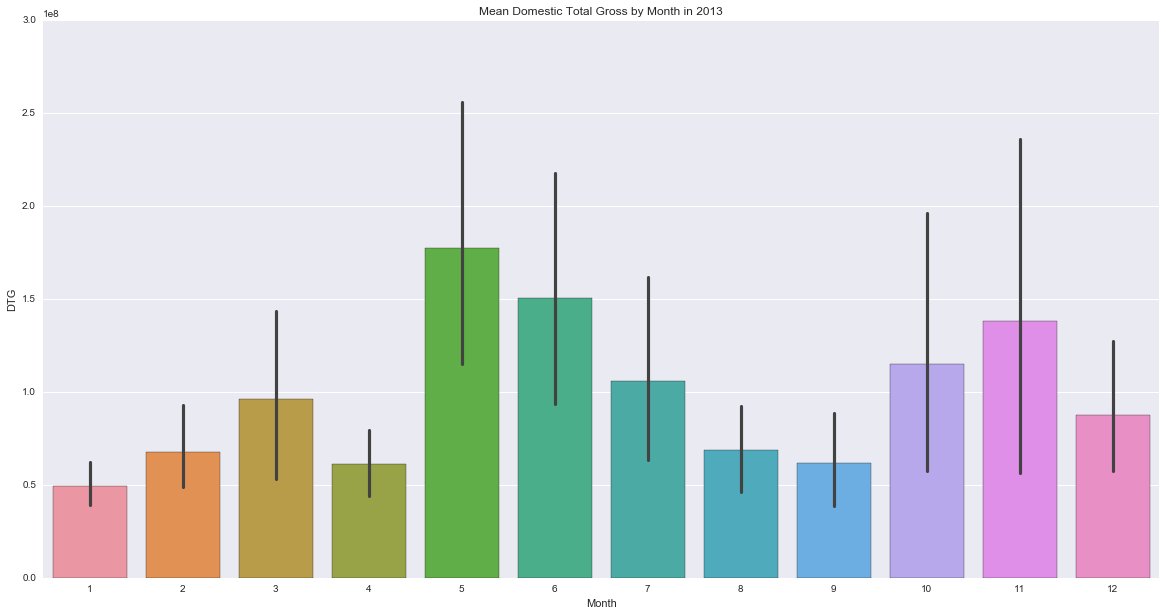

In [251]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Mean Domestic Total Gross by Month in 2013')
sns.barplot(x=df['Releasemonth'].sort_values(), y=df['DomesticTotalGross'])
ax.set_xlabel('Month')
ax.set_ylabel('DTG')